In [269]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from scipy import stats


In [270]:
df = pd.read_csv("./kpi.csv", header=0, na_values='.');
df.head()

,ticker,year,period,reportEndDate,bruttomarginal,operativtkassaflodesmarginal,vinsttillvaxt,ebittillvaxt,omsattningstillvaxt,vinst/aktie,...,fcf/aktie,rorelsemarginal,ebita/aktie,ebit/aktie,operativkassaflode/aktie,aretskassaflode/aktie,vinstmarginal,price,stockChange,stockChangePct
0,247,2018,3,Tue Oct 30 2018 00:00:00 GMT+0100 (GMT+01:00),56.972054,6.886116,NaN,NaN,NaN,0.0585,...,0.031116,13.103422,0.066037,0.065737,0.034546,0.019607,11.676132,8.50,-0.64,-0.07529411764705879
1,247,2018,2,Mon Jul 30 2018 00:00:00 GMT+0200 (GMT+02:00),53.558216,62.985123,NaN,NaN,NaN,0.0402,...,0.053366,6.262300,0.030179,0.029822,0.299949,0.054134,8.458632,6.44,2.06,0.31987577639751547
2,247,2018,1,Tue May 01 2018 00:00:00 GMT+0200 (GMT+02:00),55.590099,-19.031630,NaN,NaN,NaN,0.0373,...,-0.092223,5.600464,0.025717,0.025324,-0.086056,-0.126169,8.270116,6.12,0.32,0.05228758169934645
3,247,2017,3,Mon Oct 30 2017 00:00:00 GMT+0100 (GMT+01:00),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.12,Infinity
4,2CUREX,2018,3,Tue Oct 30 2018 00:00:00 GMT+0100 (GMT+01:00),39.222061,-112.652832,NaN,NaN,NaN,-0.0939,...,-0.503517,-21.054331,-0.080213,-0.094502,-0.505643,-0.503517,-20.938091,14.68,2.32,0.1580381471389646


In [271]:
dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]
dfVO.describe()

,vinsttillvaxt,omsattningstillvaxt
count,2738.000000,5616.000000
mean,523.645271,218.274945
std,10086.242862,3247.793706
min,-99.777779,-99.932732
25%,-16.126435,-2.450127
50%,15.335753,11.407741
75%,64.144987,38.708520
max,361662.000000,150200.000000


In [272]:
dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]

dfVO = dfVO[dfVO["omsattningstillvaxt"] > -1000]
dfVO = dfVO[dfVO["omsattningstillvaxt"] < 1000]
dfVO = dfVO[dfVO["vinsttillvaxt"] > -1000]
dfVO = dfVO[dfVO["vinsttillvaxt"] < 1000]

dfVO["omsattningstillvaxt"] = dfVO["omsattningstillvaxt"].astype(int)
dfVO["vinsttillvaxt"] = dfVO["vinsttillvaxt"].astype(int)
dfVO["stockChangePct"] = dfVO["stockChangePct"].astype(float)

dfVO = dfVO[dfVO["stockChangePct"] < 100000]




# bins = [0, 5, 10, 15, 20,30,40,50, np.inf]
# names = ['<5', '5-10', '10-15', '15-20', '20-30', '30-40', '40-50', '50+']

# test['vinsttillvaxtRange'] = pd.cut(test['vinsttillvaxt'], bins, labels=names)


dfVO = dfVO.dropna()
dfVO = dfVO.reset_index(drop=True)

print(np.isinf(dfVO["omsattningstillvaxt"]).sum())
print(np.isinf(dfVO["vinsttillvaxt"]).sum())
print(np.isinf(dfVO["stockChangePct"]).sum())

print(dfVO.dtypes)

print(dfVO.shape)

print(dfVO.describe)

0
0
0
vinsttillvaxt            int32
omsattningstillvaxt      int32
stockChangePct         float64
dtype: object
(2494, 3)
<bound method NDFrame.describe of       vinsttillvaxt  omsattningstillvaxt  stockChangePct
0                16                    7       -0.053030
1                14                    4       -0.037982
2                14                    0        0.114844
3                24                    4        0.047749
4                20                   15        0.073207
5                13                   30        0.144053
6                16                   34       -0.057616
7                18                   19        0.091300
8                 0                   11       -0.026823
9               100                  -10       -0.215702
10              199                  194        0.573394
11                6                    7       -0.044913
12               31                    6       -0.102290
13              -19                   11     

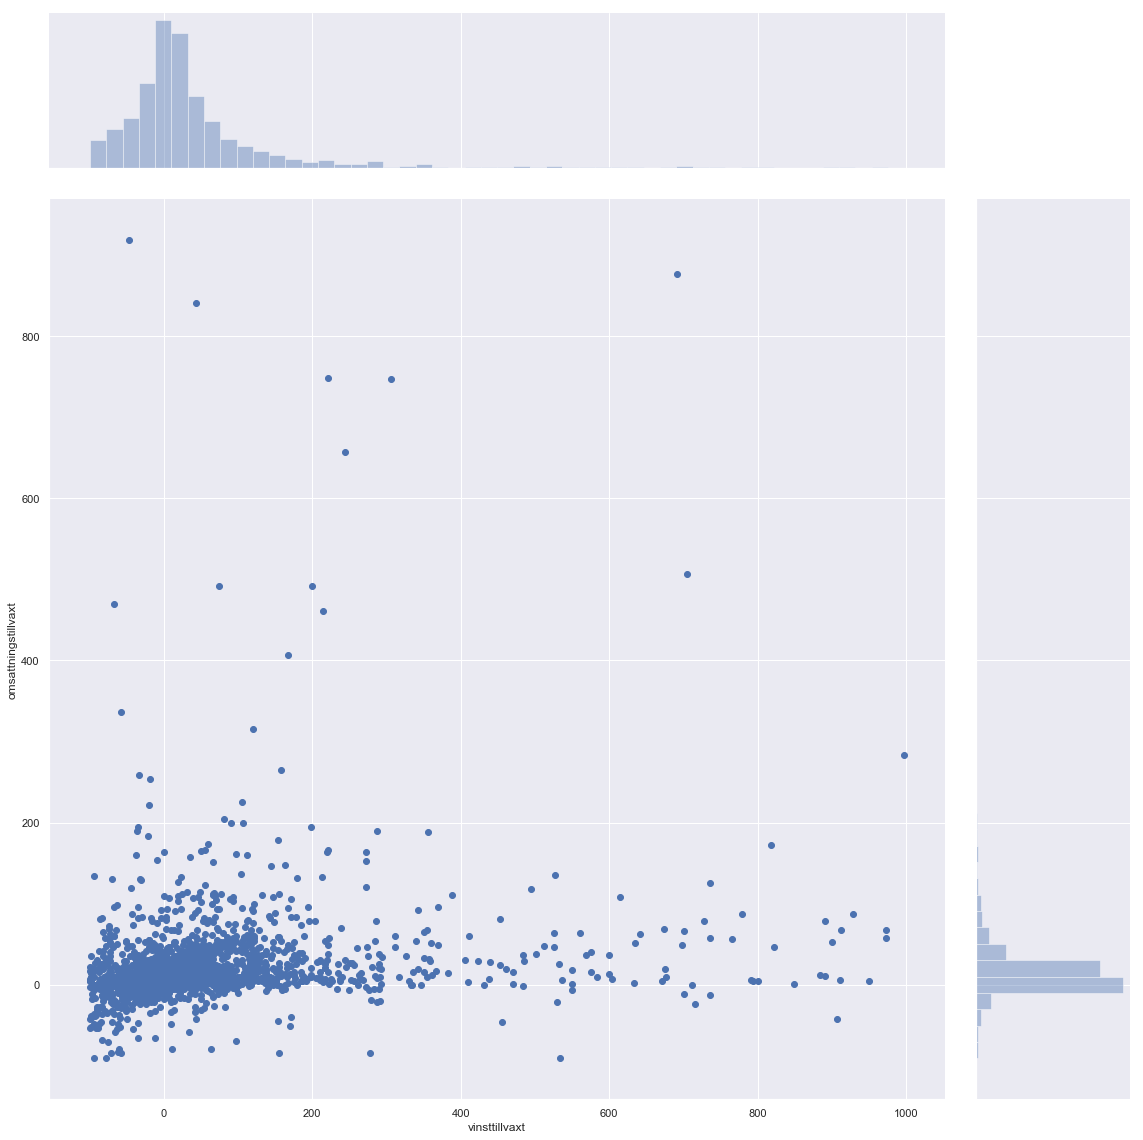

In [273]:
# dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]
sns.jointplot(x="vinsttillvaxt", y="omsattningstillvaxt", data=dfVO, height=16)

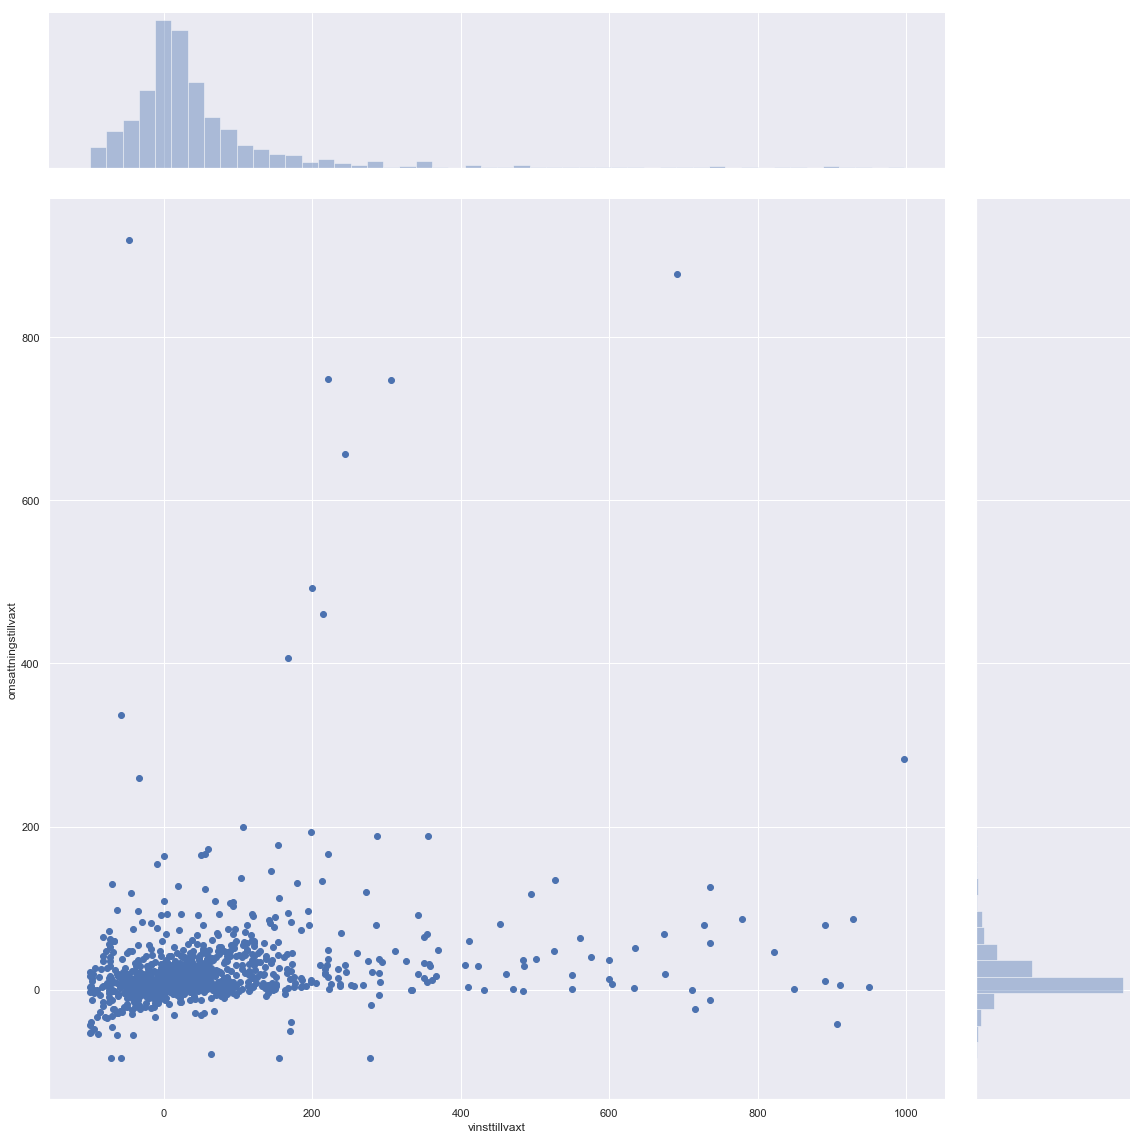

In [274]:
dfVOpos = dfVO[dfVO.stockChangePct > 0]
dfVOneg = dfVO[dfVO.stockChangePct < 0]
sns.jointplot(x="vinsttillvaxt", y="omsattningstillvaxt", data=dfVOpos, height=16)

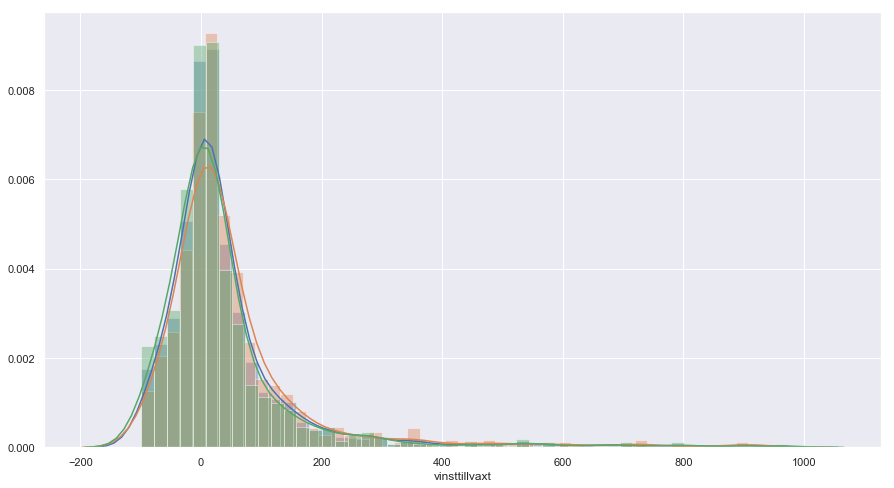

In [275]:
dfVOcopy = dfVO.copy()

dfVOcopy = dfVOcopy[dfVOcopy["omsattningstillvaxt"] > -200]
dfVOcopy = dfVOcopy[dfVOcopy["omsattningstillvaxt"] < 200]
dfVOcopy = dfVOcopy[dfVOcopy["vinsttillvaxt"] > -1000]
dfVOcopy = dfVOcopy[dfVOcopy["vinsttillvaxt"] < 1000]

dfVOpos = dfVOcopy[dfVOcopy.stockChangePct > 0]
dfVOneg = dfVOcopy[dfVOcopy.stockChangePct < 0]



plt.figure(figsize=(15,8))
# dfVO.vinsttillvaxt.plot()
sns.distplot(dfVOcopy.vinsttillvaxt)
sns.distplot(dfVOpos.vinsttillvaxt)
sns.distplot(dfVOneg.vinsttillvaxt)

# ax = sns.barplot(x="vinsttillvaxt", y="omsattningstillvaxt", data=dfVOcopy)
plt.show()

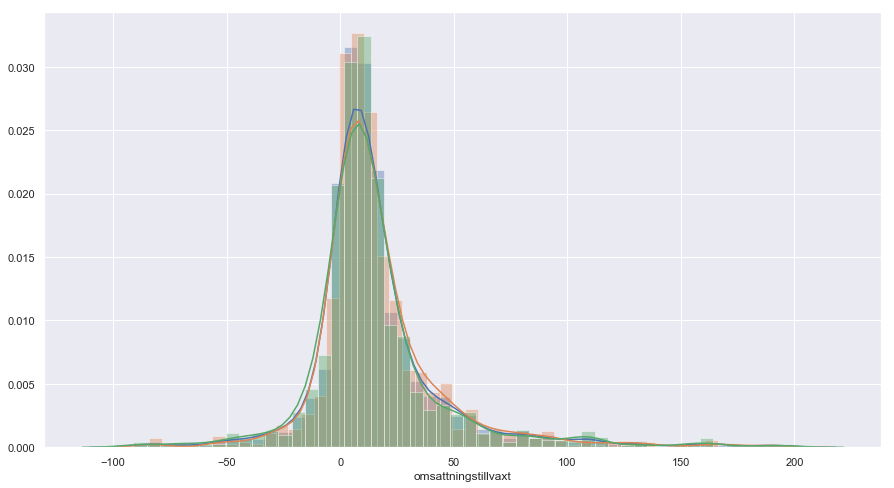

In [276]:
plt.figure(figsize=(15,8))
# dfVO.vinsttillvaxt.plot()
sns.distplot(dfVOcopy.omsattningstillvaxt)
sns.distplot(dfVOpos.omsattningstillvaxt)
sns.distplot(dfVOneg.omsattningstillvaxt)

# ax = sns.barplot(x="vinsttillvaxt", y="omsattningstillvaxt", data=dfVOcopy)
plt.show()

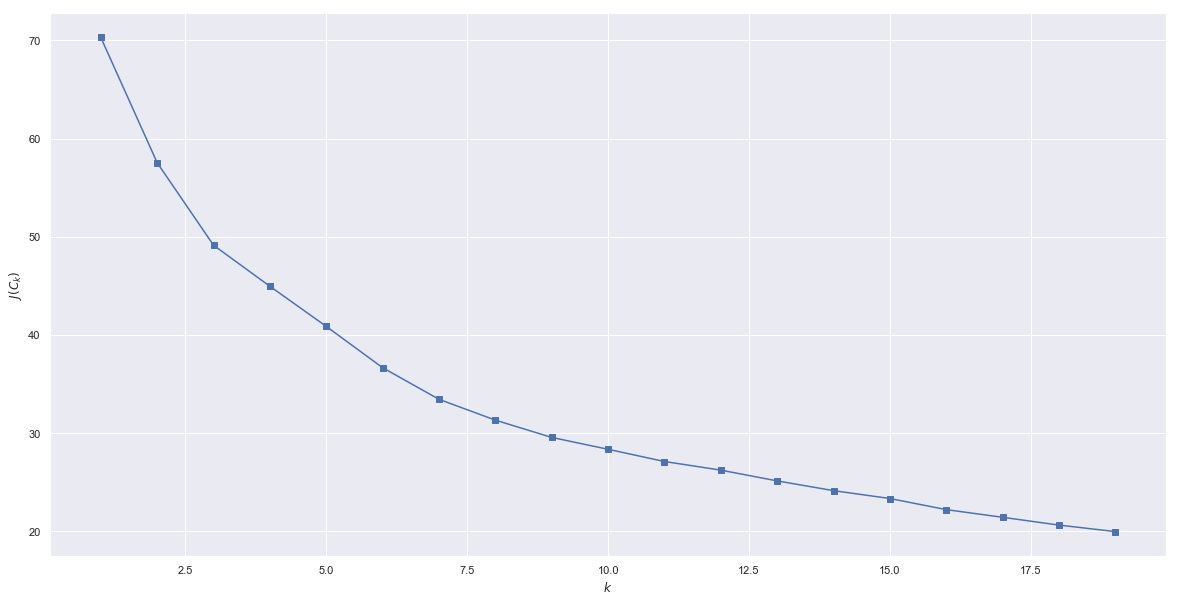

In [277]:
inertia = []
# dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]

clmns = ["vinsttillvaxt", "stockChangePct"]
X = stats.zscore(dfVOcopy[clmns])

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

           vinsttillvaxt  stockChangePct
vclusters                               
0              -1.846639       -0.218774
1              54.075949        0.346255
2             189.670543       -0.004568
3             652.842857        0.025139
4               3.745632        0.027729


Text(26.345468359374998, 0.5, 'stockChangePct')

<Figure size 1080x576 with 0 Axes>

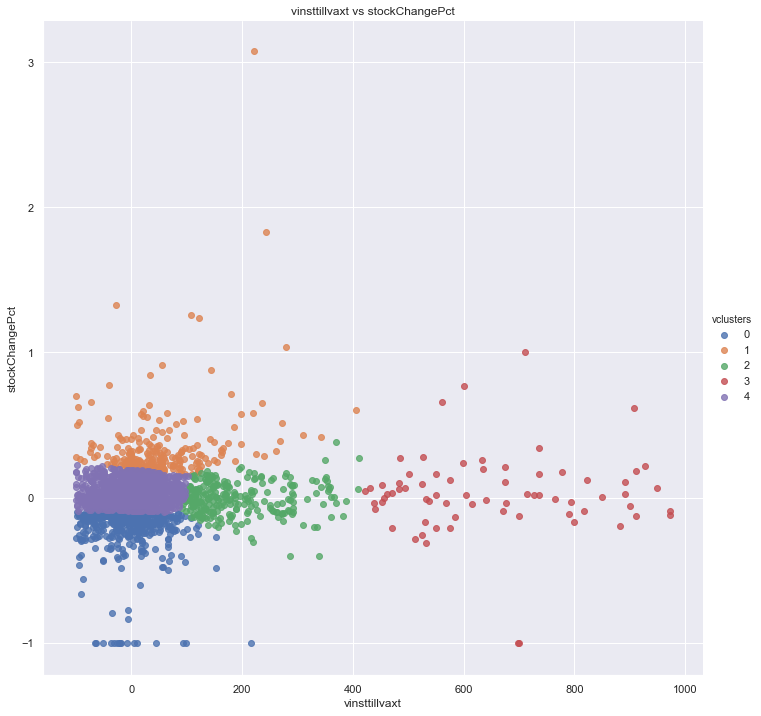

In [278]:
clmns = ["vinsttillvaxt", "stockChangePct"]
df_tr_std = stats.zscore(dfVOcopy[clmns])


#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
dfVOcopy['vclusters'] = labels

#Add the column into our list
clmns.extend(['vclusters'])

#Lets analyze the clusters
print(dfVOcopy[clmns].groupby(['vclusters']).mean())

#Scatter plot of Wattage and Duration
plt.figure(figsize=(15,8))

sns.lmplot('vinsttillvaxt', 'stockChangePct', 
           data=dfVOcopy, 
           fit_reg=False, 
           hue="vclusters",
           height=10)
plt.title('vinsttillvaxt vs stockChangePct')
plt.xlabel('vinsttillvaxt')
plt.ylabel('stockChangePct')

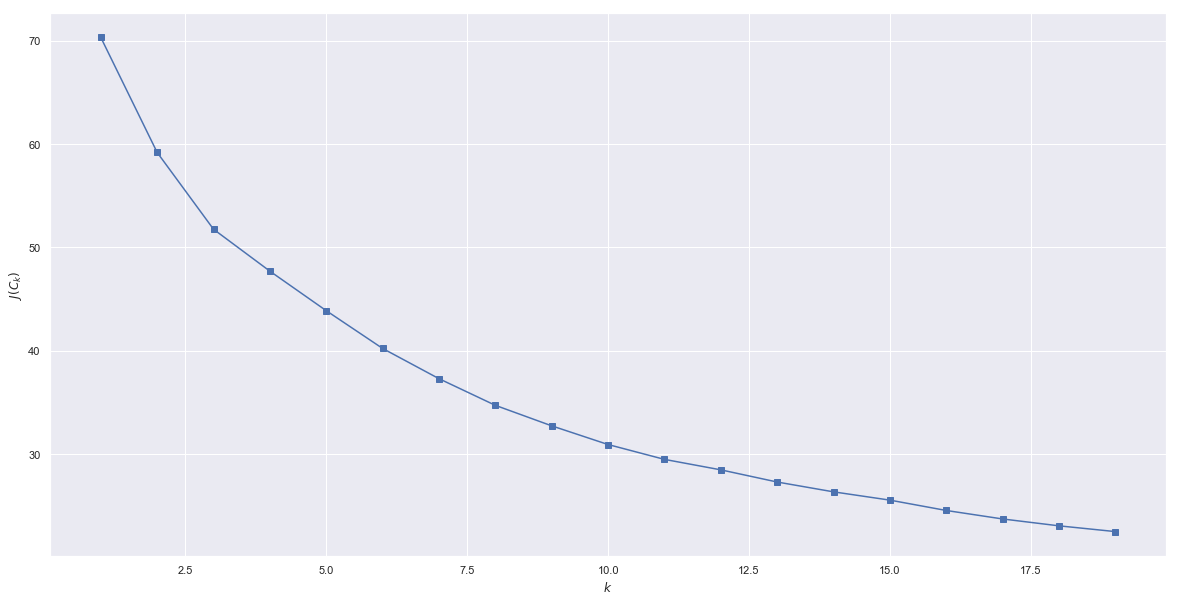

In [279]:
inertia = []
# dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]

clmns = ["omsattningstillvaxt", "stockChangePct"]
X = stats.zscore(dfVOcopy[clmns])

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

           omsattningstillvaxt  stockChangePct
oclusters                                     
0                     8.304147       -0.170268
1                    58.509615        0.249327
2                   130.608108       -0.049889
3                     9.937262        0.162280
4                     6.454545       -0.928867
5                    13.647059        0.735534
6                   -42.163043       -0.062310
7                    48.181435       -0.055004
8                    49.000000        3.075758
9                     7.656118       -0.004636


Text(26.37950091145833, 0.5, 'stockChangePct')

<Figure size 1080x576 with 0 Axes>

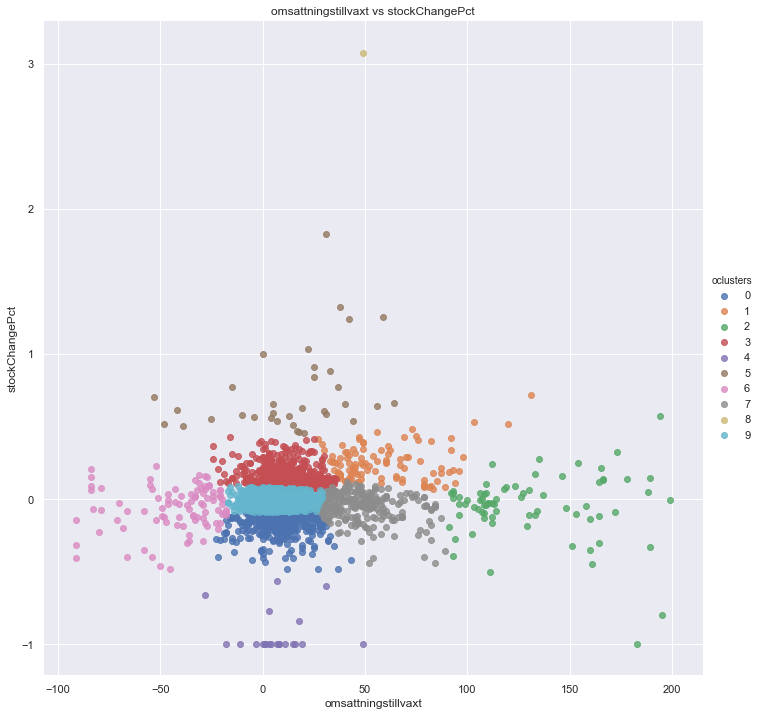

In [280]:
clmns = ["omsattningstillvaxt", "stockChangePct"]
df_tr_std = stats.zscore(dfVOcopy[clmns])


#Cluster the data
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
dfVOcopy['oclusters'] = labels

#Add the column into our list
clmns.extend(['oclusters'])

#Lets analyze the clusters
print(dfVOcopy[clmns].groupby(['oclusters']).mean())

#Scatter plot of Wattage and Duration
plt.figure(figsize=(15,8))

sns.lmplot('omsattningstillvaxt', 'stockChangePct', 
           data=dfVOcopy, 
           fit_reg=False, 
           hue="oclusters",
           height=10)
plt.title('omsattningstillvaxt vs stockChangePct')
plt.xlabel('omsattningstillvaxt')
plt.ylabel('stockChangePct')

In [281]:
dfG = dfVOcopy[dfVOcopy.vclusters == 1]
print(dfG.head())
print(dfG.vclusters.unique())
print(dfG.oclusters.unique())
print(dfG.shape)

dfG = dfG[(dfG.oclusters == 3) | (dfG.oclusters == 1) | (dfG.oclusters == 5)]
print(dfG.head())
print(dfG.oclusters.unique())
print(dfG.shape)


dfG.stockChangePct = dfG.stockChangePct * 100

    vinsttillvaxt  omsattningstillvaxt  stockChangePct  vclusters  oclusters
10            199                  194        0.573394          1          2
22             35                   25        0.843750          1          5
45             80                    9        0.272727          1          3
47            311                   47        0.427778          1          1
73             10                    4        0.204620          1          3
[1]
[2 5 3 1 8]
(237, 5)
    vinsttillvaxt  omsattningstillvaxt  stockChangePct  vclusters  oclusters
22             35                   25        0.843750          1          5
45             80                    9        0.272727          1          3
47            311                   47        0.427778          1          1
73             10                    4        0.204620          1          3
85            150                    1        0.379310          1          3
[5 3 1]
(231, 5)


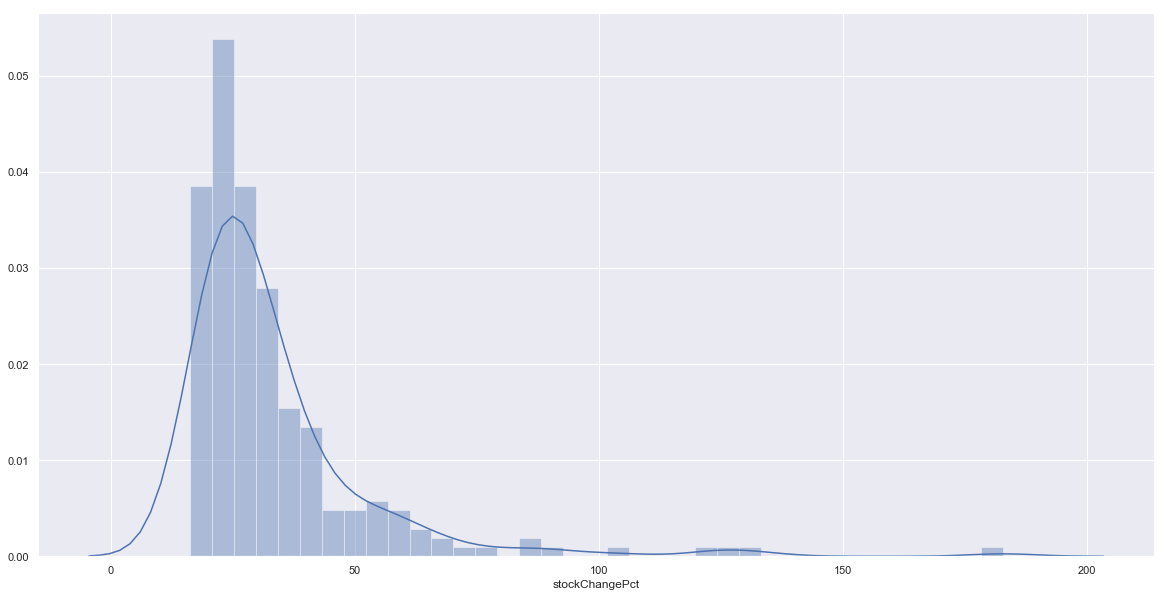

In [282]:
sns.distplot(dfG.stockChangePct)

In [283]:
dfG.describe()

,vinsttillvaxt,omsattningstillvaxt,stockChangePct,vclusters,oclusters
count,231.000000,231.000000,231.000000,231.0,231.000000
mean,52.549784,22.259740,33.498646,1.0,2.714286
std,79.578651,27.530727,20.452607,0.0,1.239114
min,-99.000000,-53.000000,16.201859,1.0,1.000000
25%,4.000000,4.000000,22.174242,1.0,1.000000
50%,40.000000,16.000000,27.204030,1.0,3.000000
75%,89.000000,38.000000,36.221608,1.0,3.000000
max,406.000000,131.000000,182.730924,1.0,5.000000


In [284]:
dfG.info

<bound method DataFrame.info of       vinsttillvaxt  omsattningstillvaxt  stockChangePct  vclusters  oclusters
22               35                   25       84.375000          1          5
45               80                    9       27.272727          1          3
47              311                   47       42.777778          1          1
73               10                    4       20.462046          1          3
85              150                    1       37.931034          1          3
90              -67                  -24       27.647059          1          3
94              -31                    1       25.133690          1          3
127              41                    8       27.204030          1          3
155              76                    2       19.927798          1          3
159               4                    4       27.055703          1          3
185             108                   59      125.738397          1          5
187             -72 

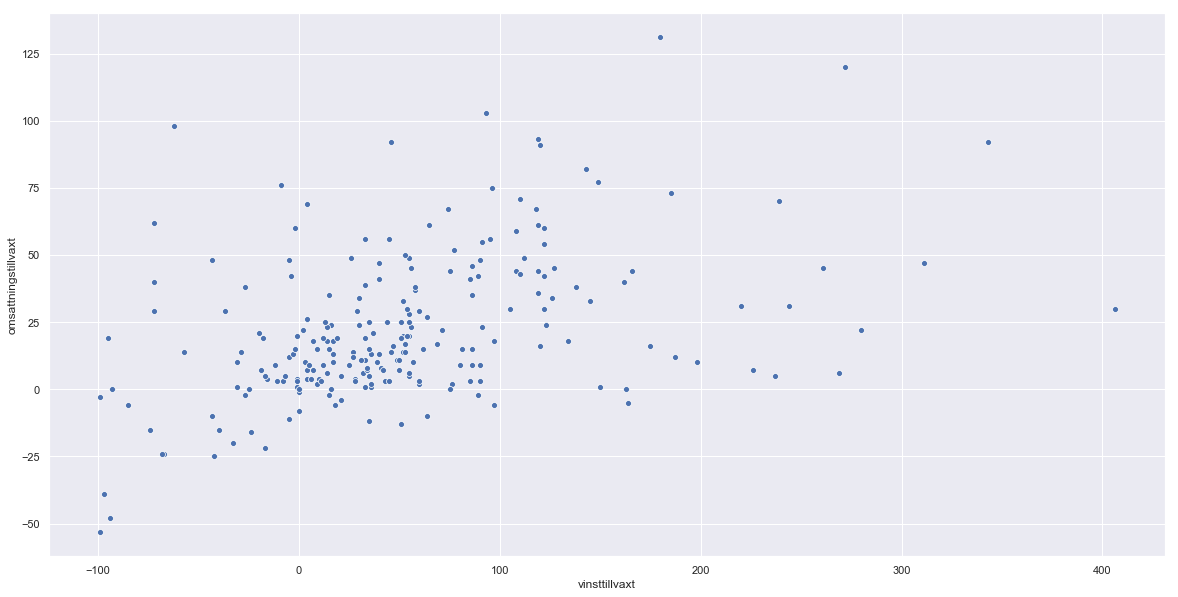

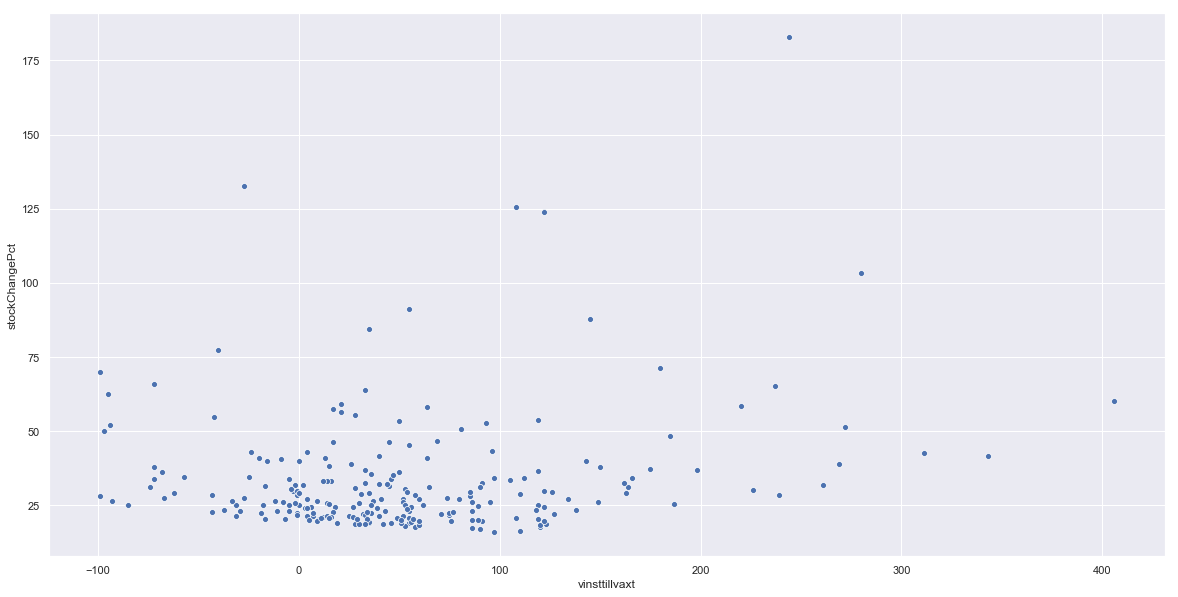

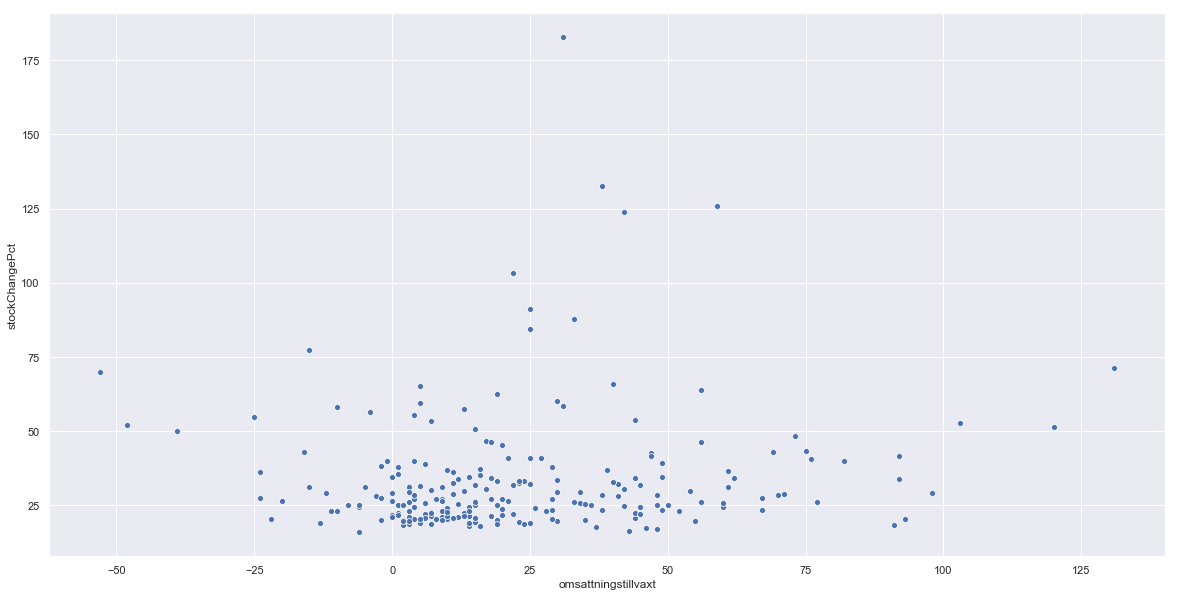

In [285]:
# dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]

sns.scatterplot(x="vinsttillvaxt", y="omsattningstillvaxt", data=dfG)
plt.show()


sns.scatterplot(x="vinsttillvaxt", y="stockChangePct", data=dfG)
plt.show()


sns.scatterplot(x="omsattningstillvaxt", y="stockChangePct", data=dfG)
plt.show()

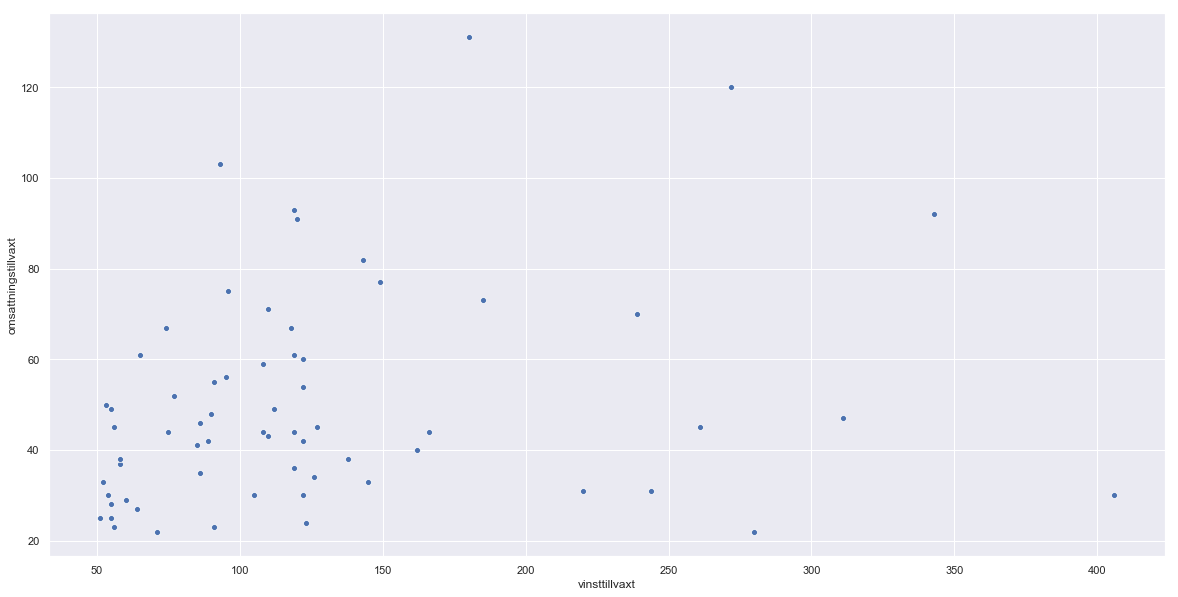

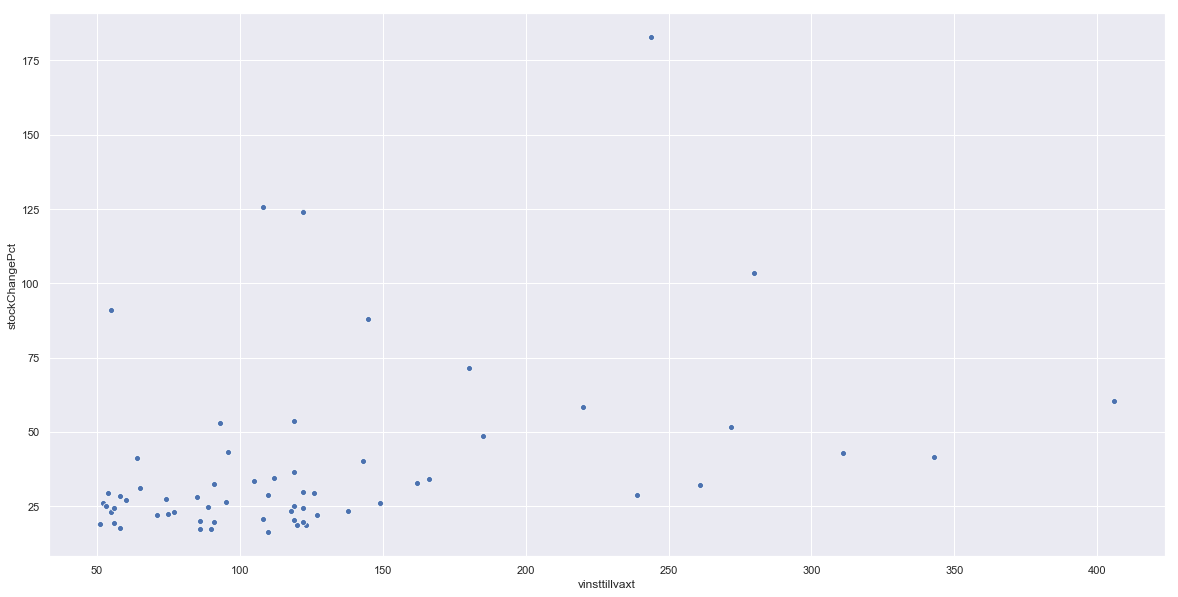

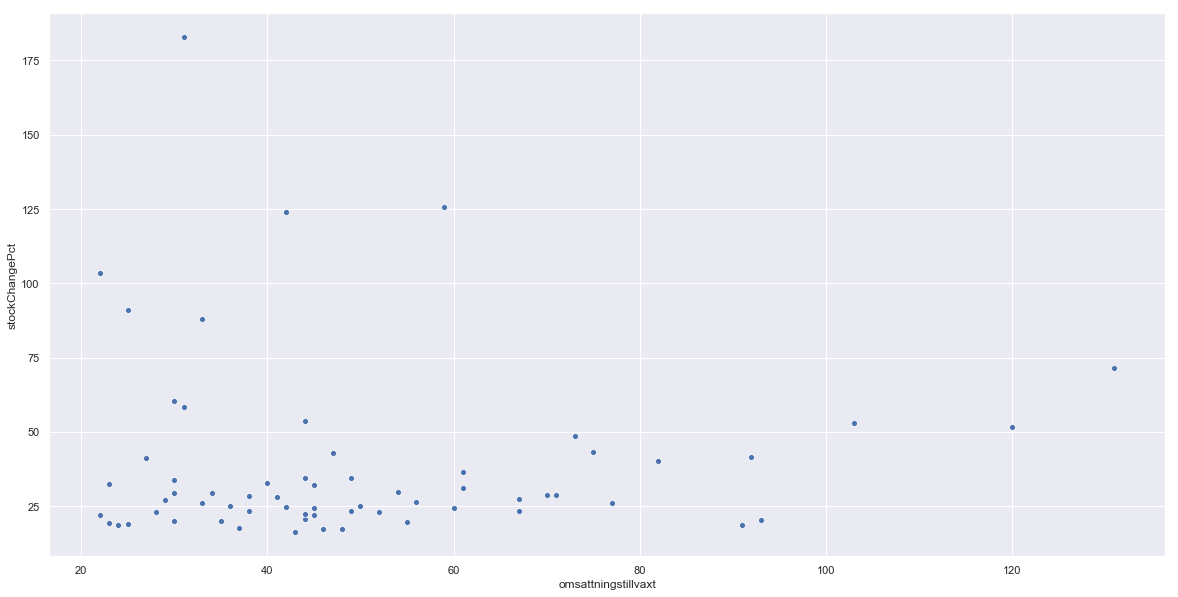

In [286]:
# dfVO = df[["vinsttillvaxt","omsattningstillvaxt", "stockChangePct"]]

dfTemp = dfG[dfG["vinsttillvaxt"]> 50]
dfTemp = dfTemp[dfTemp["omsattningstillvaxt"]> 20]


sns.scatterplot(x="vinsttillvaxt", y="omsattningstillvaxt", data=dfTemp)
plt.show()


sns.scatterplot(x="vinsttillvaxt", y="stockChangePct", data=dfTemp)
plt.show()


sns.scatterplot(x="omsattningstillvaxt", y="stockChangePct", data=dfTemp)
plt.show()